# 0.0. IMPORTS

In [1]:
import warnings
import pandas                as pd
import seaborn               as sns
import matplotlib.pyplot     as plt
import numpy                 as np
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble        import RandomForestClassifier
from sklearn.metrics         import confusion_matrix, accuracy_score
from sklearn.metrics         import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neural_network  import MLPClassifier

warnings.filterwarnings( 'ignore' )
sns.set_theme(style="whitegrid", palette="pastel")

# 0.1. LOADING DATA

In [2]:
df = pd.read_csv('data.csv')

# 1.0. DATA DESCRIPTION

In [3]:
df1 = df.copy()

# 1.1. RENAME COLUMNS

In [4]:
columns_old = df1.columns
columns = lambda x: x.title()
columns_new = list(map(columns,columns_old))

# rename
df1.columns = columns_new

# 1.2. DATA DIMENSIONS

In [5]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Cols: {}'.format(df1.shape[1]))

Number of Rows: 569
Number of Cols: 33


# 1.3. DATA TYPES

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   Radius_Mean              569 non-null    float64
 3   Texture_Mean             569 non-null    float64
 4   Perimeter_Mean           569 non-null    float64
 5   Area_Mean                569 non-null    float64
 6   Smoothness_Mean          569 non-null    float64
 7   Compactness_Mean         569 non-null    float64
 8   Concavity_Mean           569 non-null    float64
 9   Concave Points_Mean      569 non-null    float64
 10  Symmetry_Mean            569 non-null    float64
 11  Fractal_Dimension_Mean   569 non-null    float64
 12  Radius_Se                569 non-null    float64
 13  Texture_Se               569 non-null    float64
 14  Perimeter_Se             5

# 1.4. CHECK NA 

In [7]:
df1.isnull().sum()

Id                           0
Diagnosis                    0
Radius_Mean                  0
Texture_Mean                 0
Perimeter_Mean               0
Area_Mean                    0
Smoothness_Mean              0
Compactness_Mean             0
Concavity_Mean               0
Concave Points_Mean          0
Symmetry_Mean                0
Fractal_Dimension_Mean       0
Radius_Se                    0
Texture_Se                   0
Perimeter_Se                 0
Area_Se                      0
Smoothness_Se                0
Compactness_Se               0
Concavity_Se                 0
Concave Points_Se            0
Symmetry_Se                  0
Fractal_Dimension_Se         0
Radius_Worst                 0
Texture_Worst                0
Perimeter_Worst              0
Area_Worst                   0
Smoothness_Worst             0
Compactness_Worst            0
Concavity_Worst              0
Concave Points_Worst         0
Symmetry_Worst               0
Fractal_Dimension_Worst      0
Unnamed:

# 1.5. DELETE COLUMNS

In [8]:
df1.drop(columns=['Id', 'Unnamed: 32'], inplace=True)

# 1.6. DESCRIPTIVE STATISTICS

In [9]:
df1.describe()

,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave Points_Mean,Symmetry_Mean,Fractal_Dimension_Mean,...,Radius_Worst,Texture_Worst,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave Points_Worst,Symmetry_Worst,Fractal_Dimension_Worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# 2.0. EXPLORATORY ANALYSIS

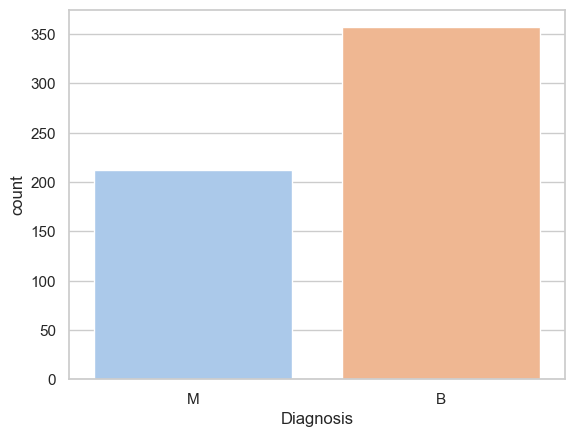

In [10]:
sns.countplot(x='Diagnosis', data=df1);
plt.show()

In [11]:
df1['Diagnosis'].value_counts()

B    357
M    212
Name: Diagnosis, dtype: int64

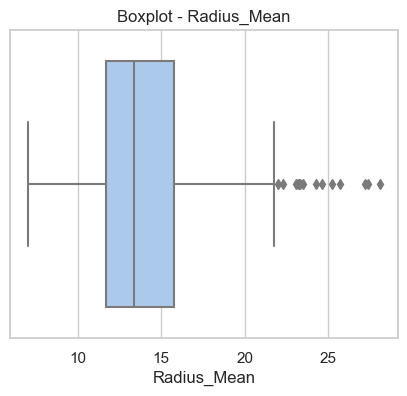

In [12]:
plt.figure(figsize=(5, 4))
plt.title('Boxplot - Radius_Mean')
sns.boxplot(x='Radius_Mean', data=df1)
plt.show();

Percebe-se que existem valores que podem ser considerados outliers.
Visualizando os casos com raio maior que 22, é possível identificar que em todos os casos, o diagnóstico é dado como maligno, ou seja, provavelmente são tumores já em estágio avançado.

In [13]:
aux = df1.loc[df1['Radius_Mean'] >= 22]
aux['Diagnosis'].value_counts()

M    14
Name: Diagnosis, dtype: int64

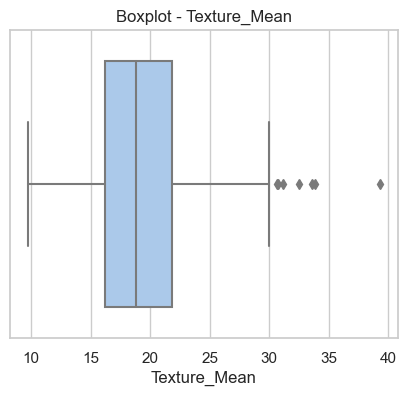

In [14]:
plt.figure(figsize=(5, 4))
plt.title('Boxplot - Texture_Mean')
sns.boxplot(x='Texture_Mean', data=df1)
plt.show();

Percebe-se que existem valores que podem ser considerados outliers, levando em conta a análise gráfica.
Na base de dados tem dois diagnóstico como benigno para textura_media >= 30. O resto é dado como maligno.

In [15]:
aux = df1.loc[df1['Texture_Mean'] >= 30]
aux['Diagnosis'].value_counts()

M    5
B    2
Name: Diagnosis, dtype: int64

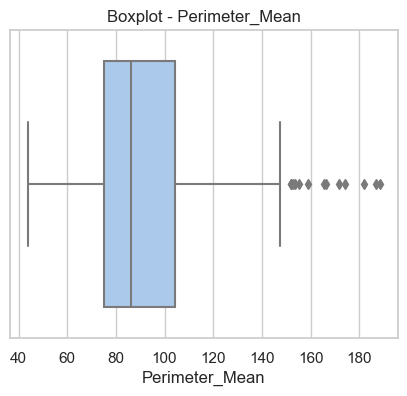

In [16]:
plt.figure(figsize=(5, 4))
plt.title('Boxplot - Perimeter_Mean')
sns.boxplot(x='Perimeter_Mean', data=df1)
plt.show();

Percebe-se que todos os registros são de casos diagnosticados como malignos.

In [17]:
aux = df1.loc[df1['Perimeter_Mean'] >= 145]
aux['Diagnosis'].value_counts()

M    15
Name: Diagnosis, dtype: int64

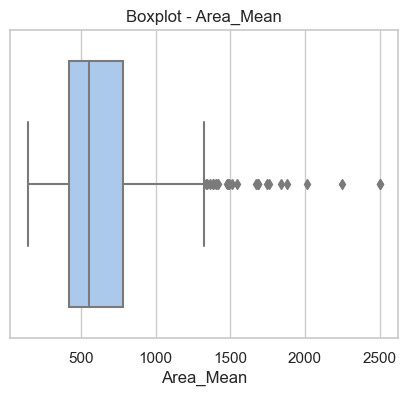

In [18]:
plt.figure(figsize=(5, 4))
plt.title('Boxplot - Area_Mean')
sns.boxplot(x='Area_Mean', data=df1)
plt.show();

Novamente, todos casos diagnosticados como maligno.

In [19]:
aux = df1.loc[df1['Area_Mean'] >= 1450]
aux['Diagnosis'].value_counts()

M    17
Name: Diagnosis, dtype: int64

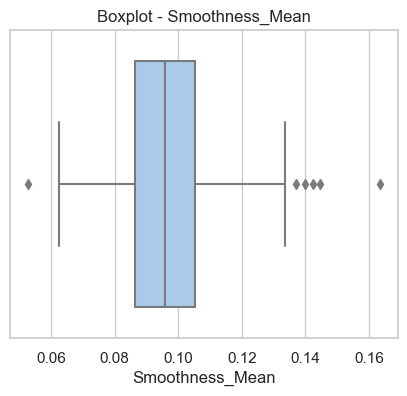

In [20]:
plt.figure(figsize=(5, 4))
plt.title('Boxplot - Smoothness_Mean')
sns.boxplot(x='Smoothness_Mean', data=df1)
plt.show();

Aqui já podemos perceber que existe possiveis outliers para as duas extremidades.

Para casos onde a suavidade_media é menor igual a 0.07, o resultado são todos os registros com diagnóstico como benigno.

In [21]:
aux = df1.loc[df1['Smoothness_Mean'] <= 0.07]
aux['Diagnosis'].value_counts()

B    11
Name: Diagnosis, dtype: int64

Já para registros com suavidade_media >= 0.13, é possível visualizar que o maior registro é referente a um caso benigno.
Ao total, são dois casos benignos e o resto, malignos.

In [22]:
aux = df1.loc[df1['Smoothness_Mean'] >= 0.13]
aux['Diagnosis'].value_counts()

M    6
B    2
Name: Diagnosis, dtype: int64

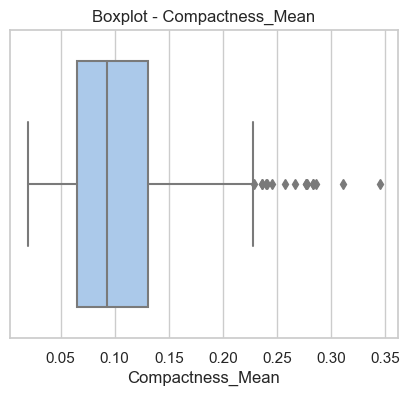

In [23]:
plt.figure(figsize=(5, 4))
plt.title('Boxplot - Compactness_Mean')
sns.boxplot(x='Compactness_Mean', data=df1)
plt.show();

Todos casos malignos.

In [24]:
aux = df1.loc[df1['Compactness_Mean'] > 0.24]
aux['Diagnosis'].value_counts()

M    12
Name: Diagnosis, dtype: int64

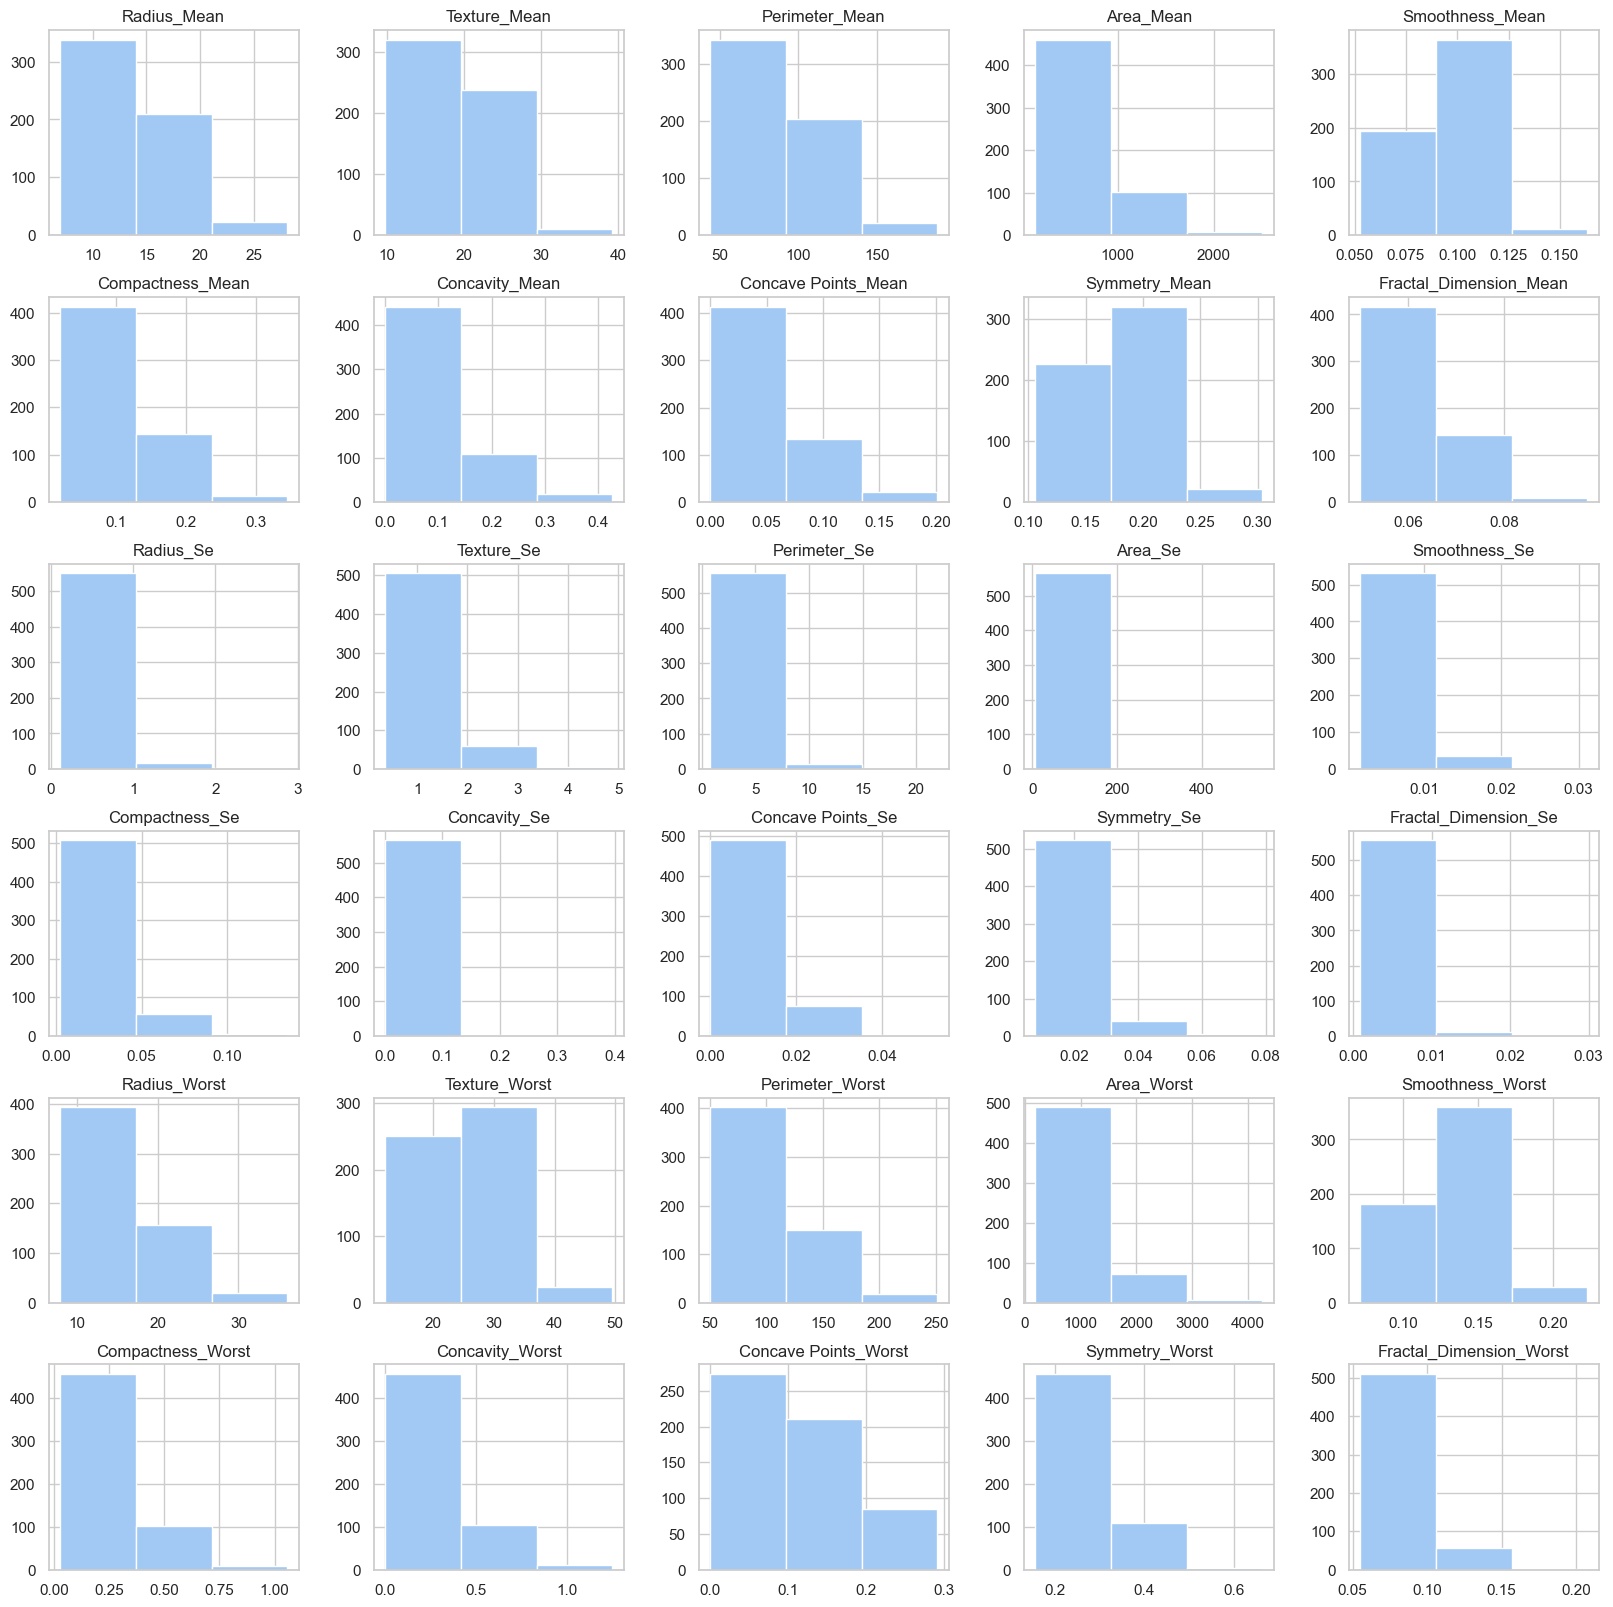

In [25]:
hist = df1.hist(bins=3, figsize=(20,20))
plt.show()

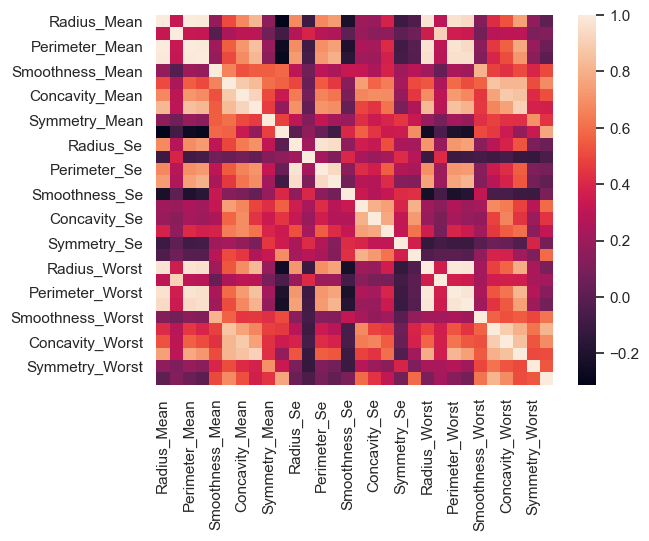

<Figure size 3000x2000 with 0 Axes>

In [26]:
sns.heatmap(df1.corr(method='pearson'))
plt.figure(figsize=(30, 20))
plt.show();

# 3.0. DATA PREPARATION

In [27]:
df2 = df1.copy()

In [28]:
X = df2.iloc[:,1:]
y = df2.iloc[:, 0]

# 4.0. MACHINE LERNING MODEL

## 4.1. RANDOMFOREST - SELECTION FEATURE

In [30]:
clf = RandomForestClassifier(n_estimators = 10,criterion='entropy', random_state=0)
clf.fit(X, y)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [31]:
print(clf.feature_importances_)

[0.03564035 0.01737073 0.03452337 0.05857573 0.01187438 0.00684933
 0.07172451 0.12897956 0.00357764 0.00297947 0.03513321 0.00169327
 0.00424618 0.09650385 0.00332078 0.00664293 0.00991675 0.00866339
 0.00534928 0.0060564  0.09021792 0.03910275 0.08668148 0.0481376
 0.01411664 0.00781252 0.01994948 0.11780966 0.00705135 0.01949948]


In [32]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X.columns,
                                   columns=['Importância']).sort_values('Importância', ascending=False)
feature_importances

,Importância
Concave Points_Mean,0.128980
Concave Points_Worst,0.117810
Area_Se,0.096504
Radius_Worst,0.090218
Perimeter_Worst,0.086681
Concavity_Mean,0.071725
Area_Mean,0.058576
Area_Worst,0.048138
Texture_Worst,0.039103
Radius_Mean,0.035640


Teste com os 12 atributos com maiores importâncias.

In [33]:
feat = X[['Concave Points_Mean', 'Concave Points_Worst', 'Area_Se', 'Radius_Worst', 'Perimeter_Worst', 'Concavity_Mean',
  'Area_Mean', 'Area_Worst', 'Texture_Worst', 'Radius_Mean', 'Radius_Se', 'Perimeter_Mean']]

## 4.2. NEURAL NETWORK - FEATURE SELECTION

In [34]:
standardscaler = StandardScaler()
feat = standardscaler.fit_transform(feat)

In [35]:
X_train_feat, X_test_feat, y_train_feat, y_test_feat = train_test_split(feat, y, test_size=0.20, random_state=0)

In [36]:
neural = MLPClassifier(hidden_layer_sizes=(16, 16, 16), random_state=0, tol= 0.00001, batch_size=10, max_iter=200)
neural.fit(X_train_feat, y_train_feat)

MLPClassifier(batch_size=10, hidden_layer_sizes=(16, 16, 16), random_state=0,
              tol=1e-05)

In [37]:
predicts = neural.predict(X_test_feat)

In [38]:
accuracy = accuracy_score(y_test_feat, predicts)
accuracy

0.956140350877193

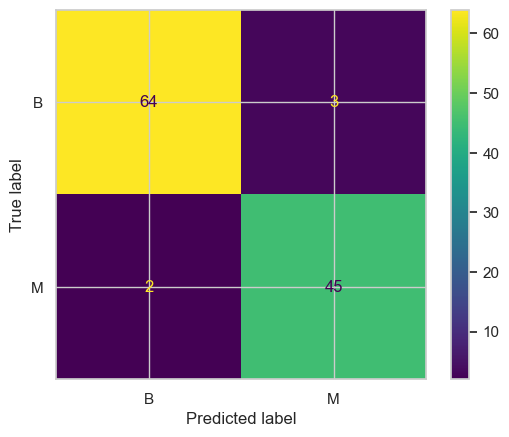

In [39]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(neural, X_test_feat, y_test_feat)
plt.show()

## 4.3 NEURAL NETWORK - ALL DATA

In [40]:
X = df2.iloc[:,1:]
y = df2.iloc[:, 0]
standardscaler_all = StandardScaler()
X = standardscaler_all.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [41]:
neural_all = MLPClassifier(hidden_layer_sizes=(16, 16, 16), random_state=0, tol= 0.00001, batch_size=10, max_iter=200)
neural_all.fit(X_train, y_train)
predicts = neural_all.predict(X_test)

In [42]:
accuracy_all = accuracy_score(y_test, predicts)
accuracy_all

0.9736842105263158

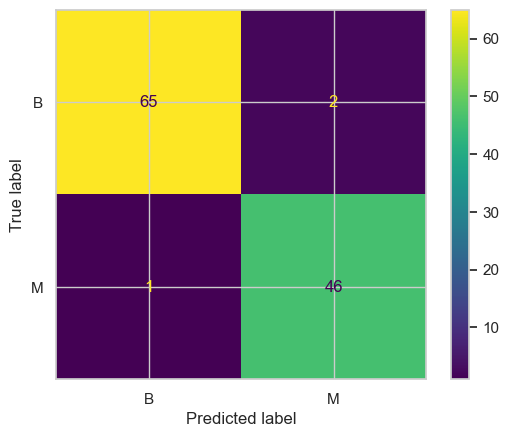

In [43]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(neural_all, X_test, y_test)
plt.show()

# 5.0. GRIDSEACHCV - FEATURE SELECTION

In [44]:
params = {'hidden_layer_sizes' : [(8, 8), (8, 8, 8), (16, 16, 16), (32, 16, 8)],
          'activation' : ['relu', 'tanh'],
          'solver' : ['adam', 'sgd'],
          'batch_size' : [10, 30],
          'max_iter' : [150, 250, 350]}
grid_search = GridSearchCV(estimator = MLPClassifier(), param_grid = params, cv = 5, scoring = 'accuracy')
grid_search.fit(feat, y)
best_parameters_feat = grid_search.best_params_
best_precision_feat = grid_search.best_score_

In [47]:
best_parameters_feat

{'activation': 'tanh',
 'batch_size': 30,
 'hidden_layer_sizes': (8, 8, 8),
 'max_iter': 350,
 'solver': 'adam'}

In [48]:
best_precision_feat

0.9771774569166279

# 5.1. GRIDSEACHCV - ALL DATA

In [49]:
params = {'hidden_layer_sizes' : [(8, 8), (8, 8, 8), (16, 16, 16), (32, 16, 8)],
          'activation' : ['relu', 'tanh'],
          'solver' : ['adam', 'sgd'],
          'batch_size' : [10, 30],
          'max_iter' : [150, 250, 350]}
grid_search = GridSearchCV(estimator = MLPClassifier(), param_grid = params, cv = 5, scoring = 'accuracy')
grid_search.fit(X, y)
best_parameters = grid_search.best_params_
best_precision = grid_search.best_score_

In [50]:
best_parameters, best_precision

({'activation': 'relu',
  'batch_size': 10,
  'hidden_layer_sizes': (8, 8),
  'max_iter': 150,
  'solver': 'sgd'},
 0.98067070330694)

# 6.0. CROSS VALIDATION - FEATURE SELECTION

In [51]:
neural_feat = MLPClassifier(hidden_layer_sizes=(8, 8, 8), batch_size=30, max_iter=350, activation= 'tanh')
scores_feat = cross_val_score(neural_feat, feat, y, cv=10)

In [52]:
scores_feat.mean(), scores_feat.std()

(0.9649122807017543, 0.020758174677542512)

In [53]:
scores_feat

array([0.94736842, 0.92982456, 0.96491228, 0.96491228, 0.98245614,
       0.98245614, 0.94736842, 0.94736842, 0.98245614, 1.        ])

# 7.1. CROSS VALIDATION - ALL DATA

In [54]:
neural_all = MLPClassifier(hidden_layer_sizes=(8, 8), batch_size=10, max_iter=150, solver= 'sgd')
scores_all = cross_val_score(neural_all, X, y, cv=10)

In [55]:
scores_all.mean(), scores_all.std()

(0.9701127819548871, 0.017651055429930118)

In [56]:
scores_all

array([0.98245614, 0.98245614, 0.94736842, 0.98245614, 0.98245614,
       0.96491228, 0.92982456, 0.98245614, 0.98245614, 0.96428571])